#### 1.The LASSO and Boosting for Regression
#### (a) Download the Communities and Crime data from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as the training set and the rest as the test set

In [1]:
#1.a
import pandas as pd 
csv_com= pd.read_csv('communities.csv')  
csv_com

,8,?,?.1,Lakewoodcity,1,0.19,0.33,0.02,0.9,0.12,...,0.12.2,0.26.1,0.2.1,0.06.3,0.04.2,0.9.1,0.5.2,0.32.2,0.14.3,0.2.2
0,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
1,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
2,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
3,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
4,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,?,?,?,?,0.00,?,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1989,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1990,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1991,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [2]:
import sys
print(sys.version)

3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


In [3]:
import numpy as np
csv_com_train=csv_com[:1495]
csv_com_test=csv_com[1495:]

In [4]:
csv_com_train

,8,?,?.1,Lakewoodcity,1,0.19,0.33,0.02,0.9,0.12,...,0.12.2,0.26.1,0.2.1,0.06.3,0.04.2,0.9.1,0.5.2,0.32.2,0.14.3,0.2.2
0,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
1,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
2,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
3,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
4,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,?,?,?,?,0.00,?,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,6,?,?,Orangecity,8,0.16,0.62,0.03,0.74,0.48,...,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.19,0.20
1491,13,?,?,Waycrosscity,8,0.01,0.36,0.95,0.24,0.03,...,0.03,0.12,0.01,?,?,?,?,0.00,?,0.30
1492,39,85,49056,Mentorcity,8,0.06,0.53,0.01,0.98,0.05,...,0.08,0.15,0.02,?,?,?,?,0.00,?,0.03
1493,34,17,79610,WestNewYorktown,8,0.05,0.43,0.08,0.65,0.12,...,0.00,1.00,1.00,0,0.01,0.77,0,0.51,0.18,0.23


In [5]:
csv_com_test

,8,?,?.1,Lakewoodcity,1,0.19,0.33,0.02,0.9,0.12,...,0.12.2,0.26.1,0.2.1,0.06.3,0.04.2,0.9.1,0.5.2,0.32.2,0.14.3,0.2.2
1495,48,?,?,LiveOakcity,8,0.00,0.55,0.13,0.78,0.15,...,0.01,0.18,0.02,?,?,?,?,0.00,?,0.11
1496,35,?,?,Portalescity,8,0.00,0.52,0.04,0.59,0.05,...,0.01,0.18,0.00,?,?,?,?,0.00,?,0.12
1497,42,17,25112,Fallstownship,8,0.04,0.51,0.07,0.92,0.09,...,0.06,0.13,0.16,?,?,?,?,0.00,?,0.06
1498,51,683,48952,Manassascity,8,0.03,0.59,0.20,0.75,0.19,...,0.03,0.23,0.06,?,?,?,?,0.00,?,0.12
1499,6,?,?,PalosVerdesEstatescity,8,0.01,0.48,0.02,0.77,0.84,...,0.01,0.23,0.05,?,?,?,?,0.00,?,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1989,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1990,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1991,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


#### (b)The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

In [6]:
#1.b
csv_com_b= pd.read_csv('communities.csv',na_values='?',header=None)  
csv_com_b

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9.0,80070.0,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,25,17.0,72600.0,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


In [7]:
x=[0,1,2,3,4]
csv_com_b_drop=csv_com_b.drop(csv_com_b.columns[x],axis=1)
csv_com_b_drop

,5,6,7,8,9,10,11,12,13,14,...,118,119,120,121,122,123,124,125,126,127
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


In [8]:
from sklearn.impute import SimpleImputer 
imputer=SimpleImputer(strategy='mean')
imputer=imputer.fit(csv_com_b_drop)
csv_com_b_imp=imputer.transform(csv_com_b_drop)

In [9]:
csv_com_b_imp

array([[0.19      , 0.33      , 0.02      , ..., 0.32      , 0.14      ,
        0.2       ],
       [0.        , 0.16      , 0.12      , ..., 0.        , 0.19507837,
        0.67      ],
       [0.        , 0.42      , 0.49      , ..., 0.        , 0.19507837,
        0.43      ],
       ...,
       [0.16      , 0.37      , 0.25      , ..., 0.91      , 0.28      ,
        0.23      ],
       [0.08      , 0.51      , 0.06      , ..., 0.22      , 0.18      ,
        0.19      ],
       [0.2       , 0.78      , 0.14      , ..., 1.        , 0.13      ,
        0.48      ]])

In [10]:
csv_com_b_imp_df=pd.DataFrame(csv_com_b_imp)
csv_com_b_imp_df

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000,0.19


In [11]:
csv_com_b_imp_train=csv_com_b_imp[:1495]
csv_com_b_imp_test=csv_com_b_imp[1495:]

In [12]:
csv_com_b_imp_train

array([[0.19      , 0.33      , 0.02      , ..., 0.32      , 0.14      ,
        0.2       ],
       [0.        , 0.16      , 0.12      , ..., 0.        , 0.19507837,
        0.67      ],
       [0.        , 0.42      , 0.49      , ..., 0.        , 0.19507837,
        0.43      ],
       ...,
       [0.01      , 0.36      , 0.95      , ..., 0.        , 0.19507837,
        0.3       ],
       [0.06      , 0.53      , 0.01      , ..., 0.        , 0.19507837,
        0.03      ],
       [0.05      , 0.43      , 0.08      , ..., 0.51      , 0.18      ,
        0.23      ]])

In [13]:
csv_com_b_imp_test

array([[0.        , 0.2       , 0.03      , ..., 0.        , 0.19507837,
        0.12      ],
       [0.        , 0.55      , 0.13      , ..., 0.        , 0.19507837,
        0.11      ],
       [0.        , 0.52      , 0.04      , ..., 0.        , 0.19507837,
        0.12      ],
       ...,
       [0.16      , 0.37      , 0.25      , ..., 0.91      , 0.28      ,
        0.23      ],
       [0.08      , 0.51      , 0.06      , ..., 0.22      , 0.18      ,
        0.19      ],
       [0.2       , 0.78      , 0.14      , ..., 1.        , 0.13      ,
        0.48      ]])

#### (c)Plot a correlation matrix for the features in the data set.

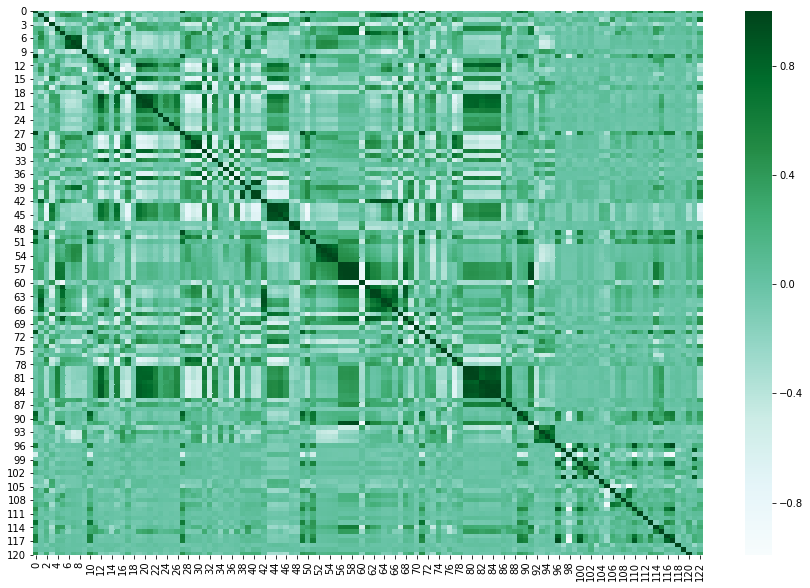

In [145]:
#1.c
#https://datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df =pd.DataFrame(csv_com_b_imp)
plt.figure(figsize=(15,10)) 
sns.heatmap(df.corr(), cmap='BuGn')

In [15]:
csv_com_b_imp_df

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000,0.19


#### (d) Calculate the Coefficient of Variation CV for each feature, where CV=s/m, in which s is sample standard deviation and m is sample mean.

In [16]:
#1.d
aa=csv_com_b_imp_df.var()/csv_com_b_imp_df.mean()
aa

0      0.279637
1      0.057841
2      0.357587
3      0.079015
4      0.283898
         ...   
118    0.010454
119    0.059659
120    0.614103
121    0.022192
122    0.228096
Length: 123, dtype: float64

#### e) Pick floor √128  features with highest CV, and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

In [17]:
#1.e
import cmath
import math
num=128
num_sqrt = math . sqrt ( num ) 
fs=math.floor(num_sqrt)
print(fs)

11


In [18]:
b = aa.sort_values(ascending=False)
b

120    0.614103
90     0.442534
5      0.375306
89     0.357634
2      0.357587
         ...   
104    0.011906
111    0.011846
105    0.010760
118    0.010454
98     0.003018
Length: 123, dtype: float64

In [19]:
b[:11]

120    0.614103
90     0.442534
5      0.375306
89     0.357634
2      0.357587
49     0.325382
115    0.324496
61     0.320580
57     0.306673
56     0.306553
58     0.303318
dtype: float64

In [20]:
cv11_df=b[:11]

In [21]:
cv11_df.index

Int64Index([120, 90, 5, 89, 2, 49, 115, 61, 57, 56, 58], dtype='int64')

In [22]:
df_new=pd.DataFrame(csv_com_b_imp_df,columns=cv11_df.index)
df_new

,120,90,5,89,2,49,115,61,57,56,58
0,0.32,0.00,0.17,0.04,0.02,0.04,0.20,0.06,0.07,0.07,0.08
1,0.00,0.00,0.07,0.00,0.12,0.00,0.45,0.10,0.27,0.25,0.25
2,0.00,0.00,0.04,0.00,0.49,0.01,0.02,0.04,0.02,0.02,0.04
3,0.00,0.00,0.10,0.00,1.00,0.03,0.28,0.08,0.08,0.05,0.11
4,0.00,0.00,0.05,0.00,0.02,0.00,0.02,0.05,0.02,0.01,0.04
...,...,...,...,...,...,...,...,...,...,...,...
1989,0.00,0.00,0.16,0.00,0.10,0.00,0.05,0.09,0.19,0.22,0.18
1990,0.00,0.00,0.32,0.01,0.46,0.03,0.20,0.36,0.68,0.70,0.63
1991,0.91,0.02,0.25,0.06,0.25,0.13,0.18,0.28,0.09,0.07,0.11
1992,0.22,0.01,0.10,0.04,0.06,0.02,0.33,0.20,0.43,0.42,0.41


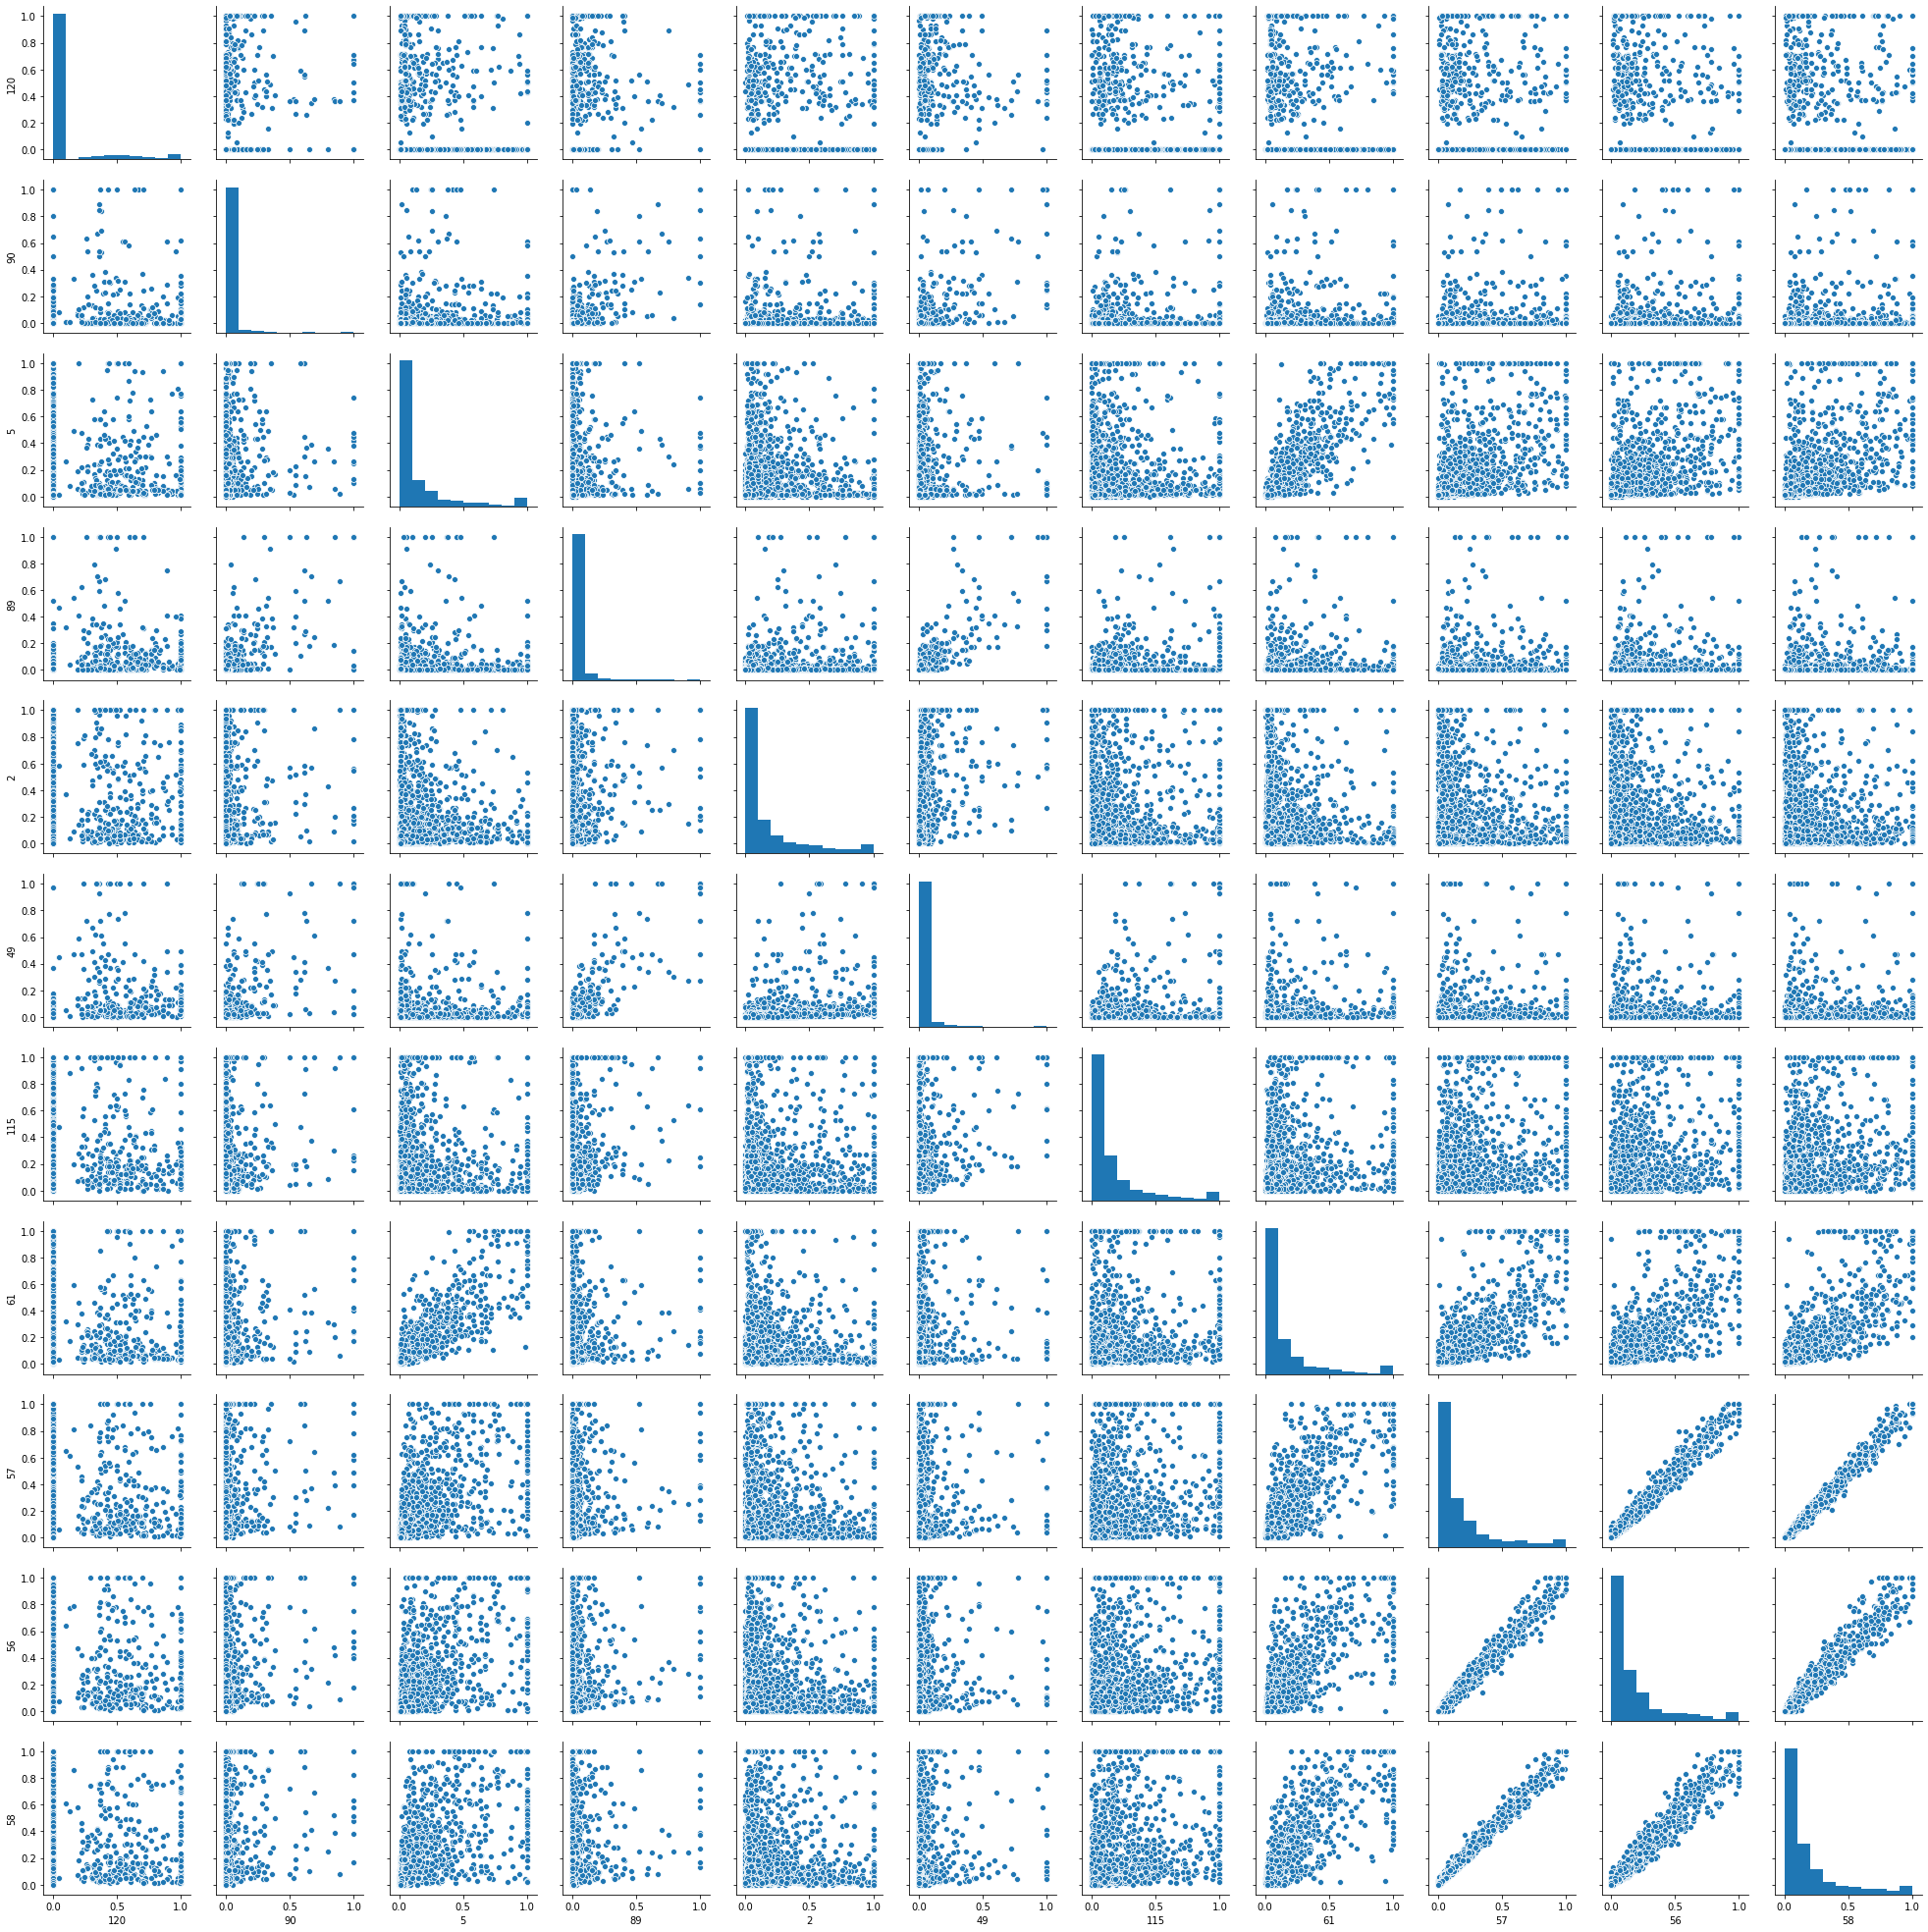

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df_new) 

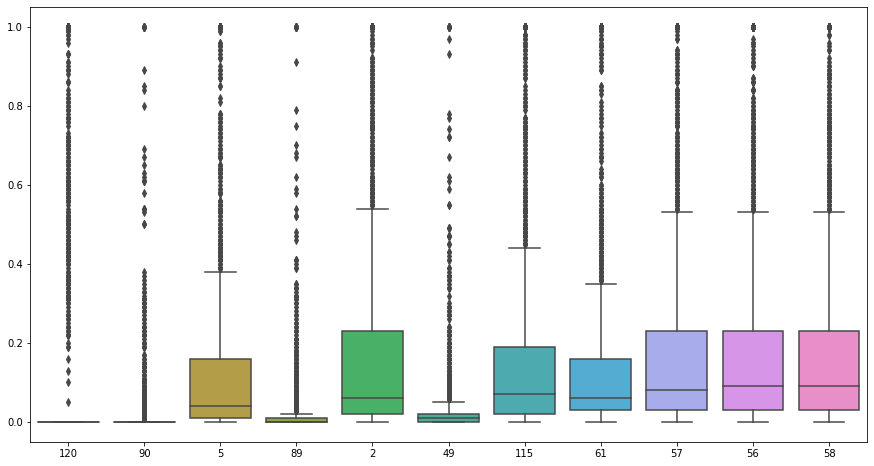

In [24]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_new)

#### (f) Fit a linear model using least squares to the training set and report the test error.

In [25]:
#1.f
csv_com_b_imp_df_train=csv_com_b_imp_df[:1495]
csv_com_b_imp_df_test=csv_com_b_imp_df[1495:]

In [26]:
csv_com_b_imp_df_train

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.070000,0.050000,0.850000,0.500000,0.61,0.190000,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03


In [27]:
csv_com_b_imp_df_test

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
1495,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.01,0.23,0.73,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
1496,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.01,0.18,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.11
1497,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.01,0.18,0.00,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
1498,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.06,0.13,0.16,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.06
1499,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.03,0.23,0.06,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000,0.19


In [146]:
from sklearn import linear_model
regr2=linear_model.LinearRegression()

csv_com_b_imp_df_train_np=csv_com_b_imp_df_train.to_numpy()
csv_com_b_imp_df_test_np=csv_com_b_imp_df_test.to_numpy()
#訓練模型 用fit
regr2.fit(csv_com_b_imp_df_train_np[:,:-1],csv_com_b_imp_df_train_np[:,-1]) #x,y放啥 
predict2=regr2.predict(csv_com_b_imp_df_test_np[:,:-1]) 
print(predict2)

[ 1.23681738e-01 -5.90243877e-02  1.79461901e-01  7.34349477e-02
  1.35134635e-01  2.36342186e-02  2.67409678e-01  5.07979032e-01
  1.36021724e-01  3.07773952e-01  2.82378734e-01  5.88730906e-01
  2.35627162e-01  5.84723277e-01  4.41611602e-01  1.60332319e-01
  3.30527153e-01  5.12298529e-01  2.58771340e-01  3.79095155e-01
  5.49805126e-03  2.09336071e-02  2.38493721e-01  2.13642556e-01
  4.37080613e-02  5.12134477e-02  6.86721458e-02  4.37008418e-02
  3.79652840e-01  6.85431078e-01  1.45732427e-01  1.84591423e-01
  2.34675111e-01  2.35986824e-01  1.10183806e-01  1.00152554e-01
  2.38067501e-02  2.86134543e-01  1.99283465e-01  3.59506811e-01
  2.01632978e-01  6.76503052e-01  2.51481132e-01  4.72114346e-01
  4.39564114e-01  3.57107475e-01  3.67431697e-01  2.44446473e-01
  6.33389878e-01  5.33022334e-01  1.59782984e-01  7.20265247e-02
  3.42922807e-01  1.44394856e-01  8.91498288e-02  1.90169420e-01
  1.19867206e-01  1.87186758e-01  2.92295847e-01  4.20543032e-01
  1.74681797e-02  2.33786

In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(csv_com_b_imp_df_test_np[:,-1],predict2)

0.7897255274315229

#### (g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [30]:
#1.g
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html
from sklearn.linear_model import RidgeCV
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(csv_com_b_imp_df_train_np[:,:-1], csv_com_b_imp_df_train_np[:,-1])
ridge_train=clf.score(csv_com_b_imp_df_train_np[:,:-1],csv_com_b_imp_df_train_np[:,-1]) 
print("train error:",ridge_train)

train error: 0.7043469579954219


In [31]:
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(csv_com_b_imp_df_test_np[:,:-1], csv_com_b_imp_df_test_np[:,-1])
ridge_test=clf.score(csv_com_b_imp_df_test_np[:,:-1],csv_com_b_imp_df_test_np[:,-1]) 
print("test error:",ridge_test)

test error: 0.722413618261619


#### (h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized features. Report the test error for both cases and compare them.

In [32]:
#1.h
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
#X, y = make_regression(noise=4, random_state=0)
reg = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(csv_com_b_imp_df_train_np[:,:-1], csv_com_b_imp_df_train_np[:,-1])
print("train error:",reg.score(csv_com_b_imp_df_train_np[:,:-1], csv_com_b_imp_df_train_np[:,-1]))
print(reg.predict(csv_com_b_imp_df_test_np[:,:-1]))

train error: 0.6677618571786543
[ 0.19867338  0.11634863  0.24670653  0.12402567  0.19497837  0.04522833
  0.22062517  0.41909528  0.1078106   0.29729429  0.22252248  0.42451824
  0.21684072  0.55921513  0.53268689  0.27126761  0.42528443  0.53935276
  0.1927055   0.40832346  0.03350015  0.06636243  0.24954516  0.18340363
  0.00773493  0.00654181  0.08391259  0.05820745  0.42784272  0.64059356
  0.12999551  0.18778131  0.23765042  0.21679336  0.12478448  0.09371574
  0.00848193  0.29526803  0.19848294  0.372311    0.18810652  0.71769
  0.24549172  0.43721239  0.38905032  0.36211993  0.37470533  0.30952879
  0.63829153  0.50767432  0.13129385  0.11685589  0.28124895  0.06014886
  0.12434876  0.15176803  0.14480707  0.18208544  0.2320981   0.34175647
  0.10724732  0.18295553  0.20170584  0.12437941  0.10114121  0.21428774
  0.05704631  0.12707457  0.71101312  0.32445133  0.13285993  0.33181342
  0.36621275  0.14795682  0.47526725  0.23204015  0.10901677  0.05078094
  0.37420208  0.283931

/Users/pks19951017/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [33]:
reg.coef_

array([ 0.        , -0.        ,  0.21102713, -0.01107561,  0.        ,
        0.        , -0.        , -0.005967  , -0.        ,  0.        ,
        0.        ,  0.03824628,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.02904338, -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.01008307,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.14515254, -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.21535704,
       -0.00696987, -0.        , -0.        , -0.04935793,  0.        ,
        0.15740797,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.00289205,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.15520986,  0.  

In [34]:
reg.coef_[3]

-0.011075611443202224

In [35]:
lst = []
for i in range(0,len(reg.coef_)):
    if reg.coef_[i] != 0:
        lst.append({"feature":i,"coef_":reg.coef_[i] })
        
lst = pd.DataFrame(lst)

In [36]:
lst

,feature,coef_
0,2,0.211027
1,3,-0.011076
2,7,-0.005967
3,11,0.038246
4,17,0.029043
5,24,0.010083
6,38,0.145153
7,44,-0.215357
8,45,-0.006970
9,48,-0.049358


In [37]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(csv_com_b_imp_df_train_np[:,:-1])
reg2= LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_scaled, csv_com_b_imp_df_train_np[:,-1])
print("test error:",reg2.score(X_scaled, csv_com_b_imp_df_train_np[:,-1]))
print(reg2.predict(csv_com_b_imp_df_test_np[:,:-1]))

/Users/pks19951017/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


test error: 0.6936306415412866
[0.20926854 0.17550907 0.20373351 0.19255741 0.20738074 0.17921795
 0.20956795 0.26123015 0.18755391 0.23166227 0.21967933 0.2796282
 0.20768569 0.29955075 0.29078769 0.21565326 0.25706403 0.28064528
 0.21510418 0.2609285  0.18060546 0.17539977 0.21433938 0.20325081
 0.17300895 0.17532511 0.18511961 0.1847042  0.26006332 0.30706351
 0.19363226 0.20284041 0.22072714 0.21695113 0.19730892 0.19044649
 0.16510411 0.23663219 0.21897243 0.24933724 0.21155108 0.3281188
 0.21831132 0.2646164  0.25818946 0.24451676 0.25601513 0.23605908
 0.32533895 0.27502468 0.20345899 0.18583012 0.23842551 0.18699553
 0.19844175 0.20864254 0.19673224 0.21029582 0.22294474 0.25052954
 0.18961108 0.20334256 0.21202458 0.19176374 0.18697201 0.21124085
 0.17928339 0.19833719 0.328041   0.2305381  0.20758081 0.2447647
 0.25574934 0.19302315 0.27599496 0.21583272 0.19894069 0.16655478
 0.24151324 0.2179778  0.25621678 0.22198587 0.19229853 0.17478624
 0.1954104  0.29079575 0.18095491 

In [38]:
reg2.coef_

array([-0.00000000e+00,  0.00000000e+00,  6.68256491e-02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  5.22105652e-03, -2.85148660e-02,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  1.56705307e-02,
        0.00000000e+00, -8.75628977e-03,  2.90212117e-03, -1.80714395e-02,
        6.82450074e-03,  3.52754742e-03, -1.56857381e-02,  0.00000000e+00,
       -0.00000000e+00, -4.07451831e-03, -3.13932680e-03, -4.99453677e-03,
        4.85743534e-03,  3.44913533e-03,  3.11700421e-03, -0.00000000e+00,
       -2.10267289e-02, -1.41171944e-04,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  1.43410981e-02, -2.06627034e-04,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  1.50660280e-02,  1.50718340e-02,
       -2.41061252e-03, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -3.96284561e-02, -8.84217437e-03, -5.53992579e-04, -0.00000000e+00,
       -1.92336710e-02, -1.87742505e-03,  2.55345599e-02, -6.37449035e-03,
       -0.00000000e+00, -

In [39]:
lst2 = []
for i in range(0,len(reg2.coef_)):
    if reg2.coef_[i] != 0:
        lst2.append({"feature":i,"coef_":reg2.coef_[i] })
        
lst2 = pd.DataFrame(lst2)

In [40]:
lst2

,feature,coef_
0,2,0.066826
1,6,0.005221
2,7,-0.028515
3,11,0.015671
4,13,-0.008756
...,...,...
63,114,0.002498
64,115,-0.007064
65,116,0.002402
66,118,0.002286


#### (i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.

In [41]:
#1.i
#https://blog.csdn.net/u012162613/article/details/42192293
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

score=[]
for i in range(1,123):

    pca=PCA(n_components=i)
    x_train_new=pca.fit_transform(csv_com_b_imp_df_train_np[:,:-1])
    x_test_new=pca.fit_transform(csv_com_b_imp_df_test_np[:,:-1])
    
#     linearRegressor = LinearRegression()
    linear=LinearRegression()
#     (x_train_new, csv_com_b_imp_df_train_np[:,-1])
    #linear= linearRegressor.predict(csv_com_b_imp_df_test_np[:,:-1])
    #lasso = linear_model.Lasso() 
    sc=-1*cross_val_score(linear, x_train_new, csv_com_b_imp_df_train_np[:,-1], cv=5, scoring = 'neg_mean_squared_error').mean()
    score.append(sc)
# score_df= pd.DataFrame(score)
print(score)
#score_df.mean(axis = 0) 

[0.037910585865150115, 0.030606866263968375, 0.027584547145377437, 0.024264180077083634, 0.023057211278202795, 0.022583193843227205, 0.0200828673456201, 0.020129928791430527, 0.020067839963849907, 0.019996571793833226, 0.020008651688805428, 0.02004644462934997, 0.01996856704606922, 0.01999602886167048, 0.020020323632954282, 0.020040141848025373, 0.020063902776744667, 0.020156585107447274, 0.020169709131280043, 0.020207430269283753, 0.020241998042168773, 0.020230507222246702, 0.020007826913751765, 0.020010500621970163, 0.020032994395152017, 0.02008141692108159, 0.020042598450181727, 0.019984547067979853, 0.01998340678599727, 0.019837263250953852, 0.019916701313928482, 0.019928815444890044, 0.019953245374368683, 0.020015205921011442, 0.019990601379336226, 0.020010229480240133, 0.019935533519755376, 0.019929065995850165, 0.019912701704542568, 0.019871831550356874, 0.019886949168937844, 0.019827611551340153, 0.01981634640087513, 0.019796346332393185, 0.019727725422145535, 0.019753088143732

In [42]:
print(score.index(min(score))+1)

96


In [43]:
pca=PCA(n_components=96)
x_train_new=pca.fit_transform(csv_com_b_imp_df_train_np[:,:-1])
x_test_new=pca.fit_transform(csv_com_b_imp_df_test_np[:,:-1])

In [44]:
print(type(csv_com_b_imp_df_test_np[2,-1]))

<class 'numpy.float64'>


In [45]:
linearRegressor = LinearRegression()
linearRegressor.fit(x_train_new, csv_com_b_imp_df_train_np[:,-1])
Prediction = linearRegressor.predict(x_test_new)
print(Prediction)

[ 0.3081326  -0.01312923  0.50627139  0.0800645   0.1108004   0.09153906
  0.25763765  0.32079001  0.27310881  0.45271361  0.18707072  0.35354093
  0.28857609  0.44861679  0.47015905  0.30922724  0.61848432  0.58215334
  0.2795724   0.30706343  0.02288504  0.14587162  0.27244844  0.3331622
  0.0011114   0.08915015  0.15696517 -0.01572334  0.45830655  0.72626566
  0.21989494  0.34980934  0.17927603  0.24685341 -0.00667437  0.20011125
  0.05378453  0.1782982   0.34556905  0.24460739  0.43112096  0.57692123
  0.27821951  0.3482787   0.58257412  0.45826463  0.27394192  0.26185576
  0.29134755  0.46400207 -0.06903964  0.29512452  0.30644458  0.10274766
  0.05535883  0.08691486  0.07175133  0.20539926  0.32338845  0.29938303
  0.26526523  0.30857554  0.20310716  0.218696    0.13443693  0.2426919
  0.15976442  0.12902221  0.60025531  0.63688625 -0.0944859   0.17216557
  0.27569393  0.21261497  0.44635333  0.34121835  0.00480501  0.00578049
  0.35037964  0.36403513  0.20511202  0.14411327  0.0

In [46]:
a=0
for i in range(0,len(Prediction)):
    if Prediction[i]!=csv_com_b_imp_df_test_np[i,-1]:
        a+=1
print('test error:',a)

test error: 499


#### (j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1penalized gradient boosting tree. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation.

In [133]:
#1.j 
import xgboost as xgb

#xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
#xgb_model.fit(X, y)

In [134]:
l=[0.0001, 0.001,0.01, 0.1, 1, 10, 100]
score=[]
for i in l:
    print(i)
    clf = xgb.XGBClassifier(booster='gbtree',reg_alpha=i)
    sc=-1*cross_val_score(clf, x_train_new, csv_com_b_imp_df_train_np[:,-1], cv=5, scoring = 'neg_mean_squared_error').mean()
    score.append(sc)

0.0001
0.001
0.01
0.1
1
10
100


In [135]:
score

[0.05061431438127091,
 0.051784816053511706,
 0.050483946488294316,
 0.05020809364548495,
 0.04809110367892977,
 0.06774936454849498,
 0.11435578595317727]

#### 2.Tree-Based Methods
#### (b) Data Preparation
#### This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea.
#### i.Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it to this data in the next steps.

In [50]:
#2. bi.
#https://www.zest.ai/blog/6-methods-for-dealing-with-missing-data
print("1.Encode NAs as -1 or -9999 2.Casewise deletion of missing data 3.Replace missing values with the mean/median value of the feature in which they occur 4.Label encode NAs as another level of a categorical variable 5.Run predictive models that impute the missing data 6.Use the number of missing values in a given row to create a new engineered feature")

1.Encode NAs as -1 or -9999 2.Casewise deletion of missing data 3.Replace missing values with the mean/median value of the feature in which they occur 4.Label encode NAs as another level of a categorical variable 5.Run predictive models that impute the missing data 6.Use the number of missing values in a given row to create a new engineered feature


In [51]:
import pandas as pd # 引用套件並縮寫為 pd  
csv_test= pd.read_csv('aps_failure_test_set.csv',skiprows=20,na_values='na')  
csv_test

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [52]:
csv_train= pd.read_csv('aps_failure_training_set.csv',skiprows=20,na_values='na')  
csv_train

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [53]:
csv_train_np=csv_train.to_numpy()
csv_train_np

array([['neg', 76698, nan, ..., 0.0, 0.0, 0.0],
       ['neg', 33058, nan, ..., 1500.0, 0.0, 0.0],
       ['neg', 41040, nan, ..., 514.0, 0.0, 0.0],
       ...,
       ['neg', 112, 0.0, ..., 0.0, 0.0, 0.0],
       ['neg', 80292, nan, ..., 388422.0, 0.0, 0.0],
       ['neg', 40222, nan, ..., 158.0, 0.0, 0.0]], dtype=object)

In [54]:
csv_test_np=csv_test.to_numpy()
csv_test_np

array([['neg', 60, 0.0, ..., 0.0, 0.0, 0.0],
       ['neg', 82, 0.0, ..., 0.0, 0.0, 0.0],
       ['neg', 66002, 2.0, ..., 0.0, 0.0, 0.0],
       ...,
       ['neg', 79636, nan, ..., 19548.0, 0.0, 0.0],
       ['neg', 110, nan, ..., 0.0, 0.0, 0.0],
       ['neg', 8, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [55]:
csv_train_re= csv_train.replace('pos',1) #testset.csv 
csv_train_re= csv_train.replace('neg',0)
csv_train_re_np=csv_train_re.to_numpy()
csv_train_re_np

array([[0, 76698, nan, ..., 0.0, 0.0, 0.0],
       [0, 33058, nan, ..., 1500.0, 0.0, 0.0],
       [0, 41040, nan, ..., 514.0, 0.0, 0.0],
       ...,
       [0, 112, 0.0, ..., 0.0, 0.0, 0.0],
       [0, 80292, nan, ..., 388422.0, 0.0, 0.0],
       [0, 40222, nan, ..., 158.0, 0.0, 0.0]], dtype=object)

In [56]:
csv_test_re= csv_test.replace('pos',1) #testset.csv 
csv_test_re= csv_test.replace('neg',0)
csv_test_re_np=csv_test_re.to_numpy()
csv_test_re_np

array([[0, 60, 0.0, ..., 0.0, 0.0, 0.0],
       [0, 82, 0.0, ..., 0.0, 0.0, 0.0],
       [0, 66002, 2.0, ..., 0.0, 0.0, 0.0],
       ...,
       [0, 79636, nan, ..., 19548.0, 0.0, 0.0],
       [0, 110, nan, ..., 0.0, 0.0, 0.0],
       [0, 8, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [57]:
#from sklearn.impute import SimpleImputer
csv_train_re.fillna(csv_train_re.mean(), inplace=True)
#imp1_re= SimpleImputer(missing_values ='NaN',strategy="mean")
#re1=imp1_re.fit_transform(csv_train_re_np[:,1:])
csv_train_re

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,153002,0.713189,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,0,2286,0.713189,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,0,112,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,0,80292,0.713189,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [58]:
csv_test_re.fillna(csv_train_re.mean(), inplace=True)
csv_test_re

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,0.000000,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,0,82,0.000000,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,0,66002,2.000000,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,0,59816,0.713189,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,0,1814,0.713189,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,81852,0.713189,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,0,18,0.000000,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,0,79636,0.713189,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,0,110,0.713189,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [101]:
#https://blog.csdn.net/weixin_34345560/article/details/93807552
from sklearn.preprocessing import Imputer
imp1_re= Imputer(missing_values ='NaN',strategy="mean")
re1=imp1_re.fit_transform(csv_train_re_np[:,1:])
re1

/Users/pks19951017/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[7.66980000e+04, 7.13188501e-01, 2.13070644e+09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.30580000e+04, 7.13188501e-01, 0.00000000e+00, ...,
        1.50000000e+03, 0.00000000e+00, 0.00000000e+00],
       [4.10400000e+04, 7.13188501e-01, 2.28000000e+02, ...,
        5.14000000e+02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.12000000e+02, 0.00000000e+00, 2.13070643e+09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.02920000e+04, 7.13188501e-01, 2.13070643e+09, ...,
        3.88422000e+05, 0.00000000e+00, 0.00000000e+00],
       [4.02220000e+04, 7.13188501e-01, 6.98000000e+02, ...,
        1.58000000e+02, 0.00000000e+00, 0.00000000e+00]])

In [60]:
train_imp_df= pd.DataFrame(re1)
train_imp_df

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002.0,0.713189,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,2286.0,0.713189,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,112.0,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,80292.0,0.713189,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [61]:
imp2_re= Imputer(missing_values ='NaN',strategy="mean")
re2=imp2_re.fit_transform(csv_test_re_np[:,1:])
re2

/Users/pks19951017/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[6.00000000e+01, 0.00000000e+00, 2.00000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.20000000e+01, 0.00000000e+00, 6.80000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.60020000e+04, 2.00000000e+00, 2.12000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [7.96360000e+04, 7.72064889e-01, 1.67000000e+03, ...,
        1.95480000e+04, 0.00000000e+00, 0.00000000e+00],
       [1.10000000e+02, 7.72064889e-01, 3.60000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.00000000e+00, 0.00000000e+00, 6.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

#### ii. For each of the 170 features, calculate the coefficient of variation CV=s/m, where s is sample standard deviation and m is sample mean.

In [62]:
#2. bii.
import numpy as np
csv_train_re_std=[]
csv_train_re_mean=[]
csv_train_re_cv=[]
for i in range(1,171):
    a=csv_train_re.iloc[:,i].std()
    csv_train_re_std.append(a)
    b=csv_train_re.iloc[:,i].mean()
    csv_train_re_mean.append(b)
    c=a/b
    csv_train_re_cv.append(c)
#ll.sort()
#print(csv_train_re_std)
#print(csv_train_re_mean)
unsort_train= csv_train_re_cv
sorted_train_idx = np.argsort(unsort_train)
csv_train_re_cv.sort(reverse=True)
print(csv_train_re_cv)

[235.27760461029902, 184.23309219117692, 183.94901745596403, 183.84762036900082, 114.98499085012163, 109.6472849388733, 91.87856462936738, 86.41690384051536, 83.78606300858695, 76.96797806358856, 74.5266879586007, 68.1605540126918, 58.268228662292024, 52.23385176360165, 49.00215810098666, 48.79901491451668, 47.68230960735955, 47.124953091672005, 43.80182238271878, 40.55324999114492, 38.809580401918666, 37.08367624939188, 37.009562327062504, 35.914418426339644, 34.854950077721575, 34.564625419181496, 33.88067479556715, 33.83761582350898, 33.37471600468463, 33.35988009366405, 32.98435104133622, 28.413541533699558, 28.17467509343771, 26.033814628328138, 23.4594247908152, 23.190936665578853, 22.605161184632596, 22.425769593584352, 21.028170847144775, 18.658921096017636, 18.01268174446153, 17.369143404889634, 16.0475831066938, 13.314694485610156, 13.22643929894233, 13.141692934269287, 12.581821193680259, 12.384140755927538, 11.194424576584552, 11.133096187166533, 11.033810823646995, 11.0069

In [63]:
sorted_train_idx

array([ 89,  78,  77,  76,  75,  74,  73,  71,  72,  86,  87,  79, 131,
       125, 113, 144, 143, 119, 148,   2,  90, 157,  22,  23, 147,  67,
        16,   1, 104,  12, 156, 111,  82,  81,  62,  94,  84,  80,  83,
         0,  88, 118, 161, 160, 103, 162,  53,  68,  56,  57,  52,  55,
       149,  59,  46, 163,  13,  25, 142,  54,  11, 132,  69,  58,  47,
        38,  96,  24, 116, 105, 164, 166, 159, 158,  39, 150,  92,  70,
       114,  40, 126,  31, 102, 155, 133,  98, 117, 130, 165, 115,  64,
       151, 120,  10, 124, 167,  30,  85,  14, 106, 123, 146,  65, 101,
        60,  63,  66, 152,  45,  43,   9,  48,  21,  20,  61,  42, 107,
        26,  95, 137, 100, 128,  37,  97,  44, 112, 110,  49,   8,  17,
         5, 145,  50, 129,   4,  28,  99, 127,  35,  15, 154,  36, 141,
       108, 139,   7, 135,  32, 140,  34, 169,  18, 168, 121, 134, 153,
        33,  93,  29,  19,  51,  41,  27,   6, 138, 136,   3, 109,  91,
       122])

In [64]:
import numpy as np
csv_test_re_std=[]
csv_test_re_mean=[]
csv_test_re_cv=[]
for i in range(1,171):
    a=csv_test_re.iloc[:,i].std()
    csv_test_re_std.append(a)
    b=csv_test_re.iloc[:,i].mean()
    csv_test_re_mean.append(b)
    c=a/b
    csv_test_re_cv.append(c)
#ll.sort()
#print(csv_train_re_std)
#print(csv_train_re_mean)
unsort_test= csv_test_re_cv
sorted_test_idx = np.argsort(unsort_test)
csv_test_re_cv.sort(reverse=True)
print(csv_test_re_cv)

[125.54729083124283, 93.33608430249951, 85.04335924969456, 83.05589570005706, 77.43365436737272, 62.85174754007055, 58.94997245581383, 58.00203440605237, 56.432730167154745, 52.572601500354956, 49.75639380443461, 48.7893279411284, 45.377616786757415, 45.33647115738426, 45.07955596793944, 43.25407846798867, 41.52320611412869, 40.92843682144078, 40.07000314818607, 38.78479983487718, 37.20665184031261, 36.76602785547712, 32.85466994132617, 30.329264793174413, 30.28665991505069, 29.63449608418669, 29.495314437112423, 28.690393489687274, 28.031016869018135, 22.26881649455384, 21.74043178564092, 21.417665670064554, 21.11939416378412, 19.622362331693438, 19.211836230379326, 19.122211009492354, 17.93735709842273, 17.07394769776951, 15.992113395055227, 14.548261733814284, 13.183664434838422, 12.944008668583663, 12.017723091301589, 11.661147596789414, 11.2183802709309, 10.36256576804521, 10.224839358809175, 9.990004678742427, 9.379877093677068, 9.126244898466043, 9.077224684283392, 9.00284665379

In [65]:
print(sorted_test_idx)

[ 89  78  77  76  75  74  73  71  72  86  87  79 130 131 125   1   3 109
  91 119   2  90 144 148 113  22  23 157 104  67  16 147 156  12  94 143
  84  82 111  81  62 120 118 161  83  88  68 160 162 105  52  56  13 103
  55  53  57 114 149  59  25 142  46  54 163  58  38  69  96  11  39 159
  24 132  47 164 116  92 133 150 158  70 126 166  31  40 123 102 165 124
  64 151 117 115  98 155  65 106  30  63  10  85 167  44  43  60  14 146
  66 101  80   0 152  42  45 128  48  37  21   9  20  26  61 107 110  97
  95 137 112  49 100   5   8   4 138  17 108 127 145  50  28  35  99  15
 154 135  36 129  34 141 140  32  18  33   7  41 139 136 153 168   6  93
 169  51 121 134  27  29  19 122]


#### iii. Plot a correlation matrix for your features using pandas or any other tool.

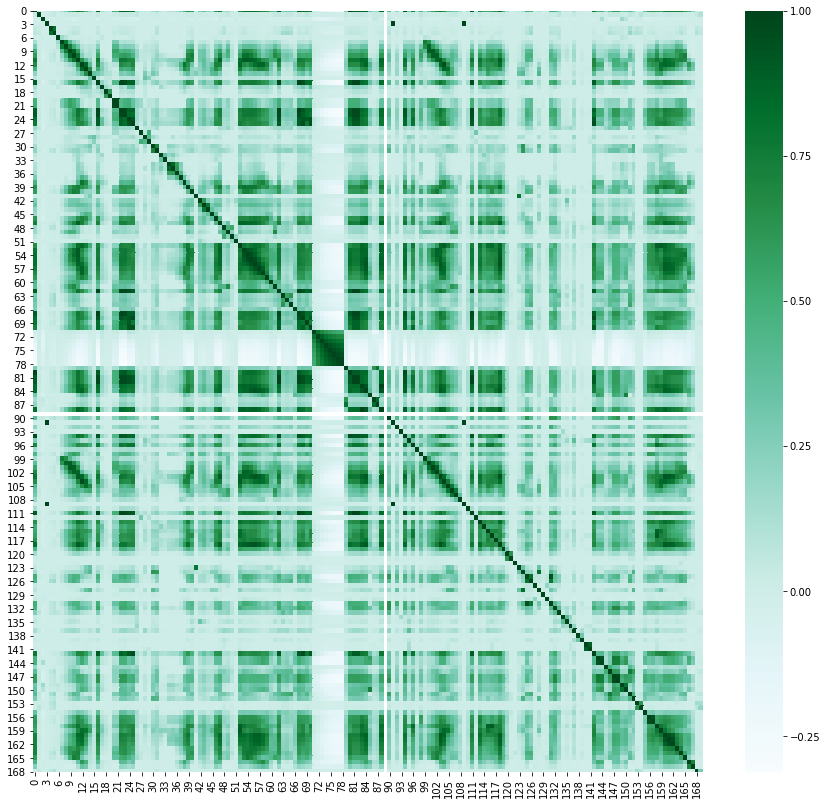

In [66]:
#2. biii.
df =pd.DataFrame(re1)
plt.figure(figsize=(15,14)) 
sns.heatmap(df.corr(), cmap='BuGn')

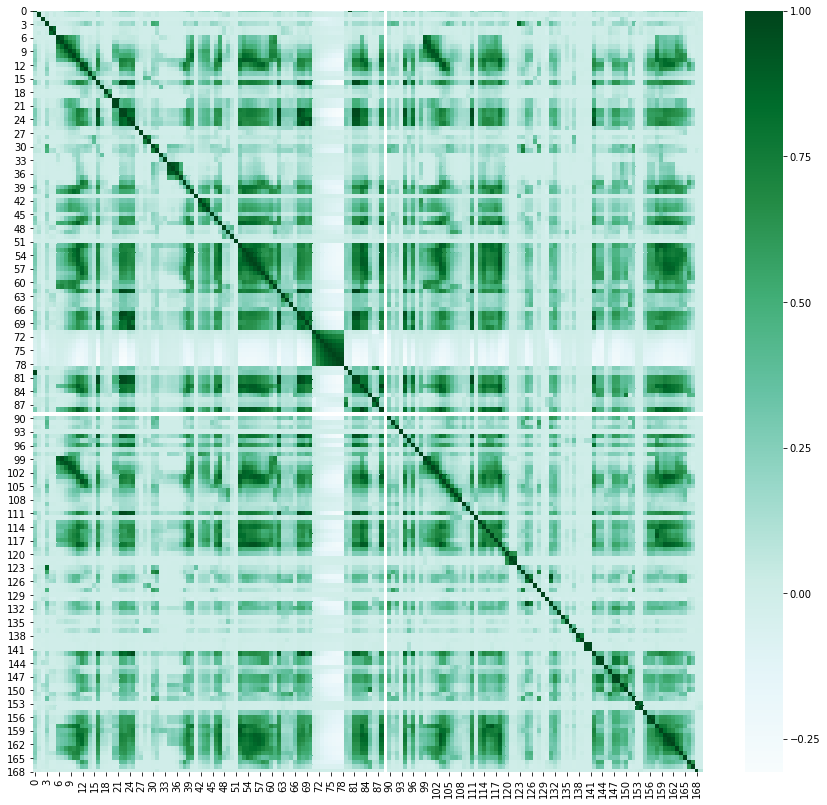

In [67]:
df =pd.DataFrame(re2)
plt.figure(figsize=(15,14)) 
sns.heatmap(df.corr(), cmap='BuGn')

#### iv. Pick floor√170 features with highest CV, and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

In [68]:
#2. biv.
import cmath
import math
num=170
num_sqrt = math . sqrt ( num ) 
fs=math.floor(num_sqrt)
print(fs)

13


In [69]:
x=[0]*13
x

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

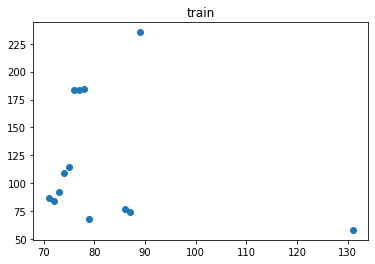

In [70]:
import matplotlib.pyplot as plt
plt.title("train")
cv_13_tr=plt.scatter(sorted_train_idx[0:13],csv_train_re_cv[0:13],marker='o')  #x軸要放啥
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1a8ad9a490>,
 'caps': [<matplotlib.lines.Line2D at 0x1a8ad9af90>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1a8ad8cc10>],
 'medians': [<matplotlib.lines.Line2D at 0x1a8ada19d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a8ada1f10>],
 'means': []}

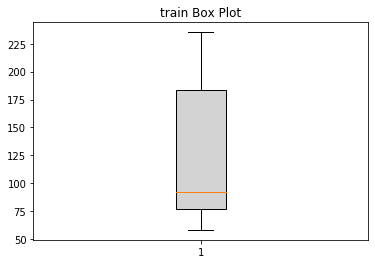

In [71]:
fig1, ax1 = plt.subplots()
ax1.set_title('train Box Plot')
ax1.boxplot(csv_train_re_cv[0:13], 
            showmeans=False, # 显示均值
            showfliers=True, # 显示异常点
            flierprops=dict(markerfacecolor='g', marker='D'), # 异常值样式
            notch=False, # 默认95%的置信区间，在中值附近
            patch_artist=True, #使用自定义颜色填充盒形图，一定要先设置才可以定义颜色
            boxprops = {'color':'black','facecolor':'lightgrey'}, 
            whis=0.75
           )

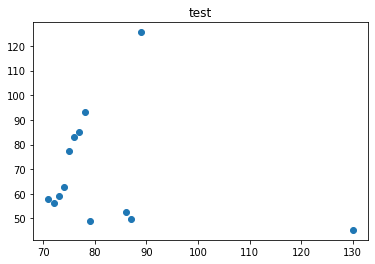

In [72]:
plt.title("test")
cv_13_te=plt.scatter(sorted_test_idx[0:13],csv_test_re_cv[0:13],marker='o')  #x軸要放啥
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1a8b0286d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a8b010d50>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1a8b018e50>],
 'medians': [<matplotlib.lines.Line2D at 0x1a8b02dc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a8b028cd0>],
 'means': []}

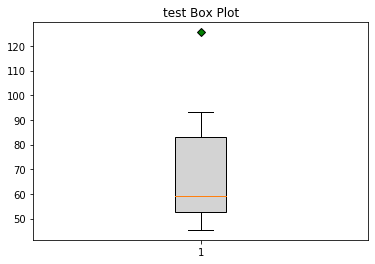

In [73]:
fig1, ax1 = plt.subplots()
ax1.set_title('test Box Plot')
ax1.boxplot(csv_test_re_cv[0:13], 
            showmeans=False, # 显示均值
            showfliers=True, # 显示异常点
            flierprops=dict(markerfacecolor='g', marker='D'), # 异常值样式
            notch=False, # 默认95%的置信区间，在中值附近
            patch_artist=True, #使用自定义颜色填充盒形图，一定要先设置才可以定义颜色
            boxprops = {'color':'black','facecolor':'lightgrey'}, 
            whis=0.75
           )

#### v.Determine the number of positive and negative data. Is this data set imbalanced?

In [74]:
#2. bv.
#csv_train['class'].count()
csv_train.groupby('class').size()
#csv_train['neg'].count()

class
neg    59000
pos     1000
dtype: int64

In [75]:
csv_test.groupby('class').size()

class
neg    15625
pos      375
dtype: int64

In [76]:
print("imbalanced")

imbalanced


#### (c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

In [77]:
#2.c  
csv_train.iloc[:,0].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

In [78]:
csv_test.iloc[:,0].value_counts()

neg    15625
pos      375
Name: class, dtype: int64

In [98]:
re1

array([[7.66980000e+04, 7.13188501e-01, 2.13070644e+09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.30580000e+04, 7.13188501e-01, 0.00000000e+00, ...,
        1.50000000e+03, 0.00000000e+00, 0.00000000e+00],
       [4.10400000e+04, 7.13188501e-01, 2.28000000e+02, ...,
        5.14000000e+02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.12000000e+02, 0.00000000e+00, 2.13070643e+09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.02920000e+04, 7.13188501e-01, 2.13070643e+09, ...,
        3.88422000e+05, 0.00000000e+00, 0.00000000e+00],
       [4.02220000e+04, 7.13188501e-01, 6.98000000e+02, ...,
        1.58000000e+02, 0.00000000e+00, 0.00000000e+00]])

In [106]:
train_df= pd.read_csv('aps_failure_training_set.csv',skiprows=20,na_values='na') 
test_df= pd.read_csv('aps_failure_test_set.csv',skiprows=20,na_values='na') 

train_df = train_df.applymap(lambda x: np.nan if x == 'na' else x)
train_df = train_df.apply(pd.to_numeric, errors='ignore')
train_df = train_df.fillna(value = train_df.mean(), axis=0)

test_df = test_df.applymap(lambda x: np.nan if x == 'na' else x)
test_df = test_df.apply(pd.to_numeric, errors='ignore')
test_df = test_df.fillna(value = test_df.mean(), axis=0)

train_df['class'] = train_df['class'].apply(lambda x: 1 if x == 'pos' else 0)
test_df['class'] = test_df['class'].apply(lambda x: 1 if x == 'pos' else 0)

#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X_train = train_df.iloc[:,1:]
y_train = train_df.iloc[:,0]
X_test = test_df.iloc[:,1:]
y_test = test_df.iloc[:,0]

clf = RandomForestClassifier(n_estimators=100, random_state=0, oob_score=True)  
clf.fit(X_train, y_train) 
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [108]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train, y_train_pred)
cm

array([[59000,     0],
       [    0,  1000]])

In [109]:
cm2=confusion_matrix(y_test, y_test_pred)
cm2

array([[15604,    21],
       [  106,   269]])

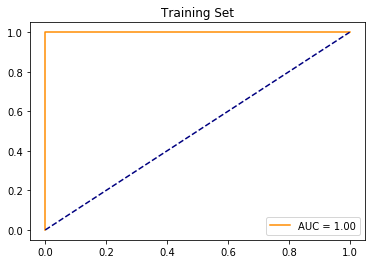

training set misclassification rate: 0.0


In [116]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
roc_auc = auc(fpr,tpr)
plt.plot(fpr, tpr, color='darkorange', label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.title('Training Set')
plt.legend(loc="lower right")
plt.show()

misclass_rate_train = 1 - accuracy_score(y_train, y_train_pred)
print('training set misclassification rate:',misclass_rate_train)

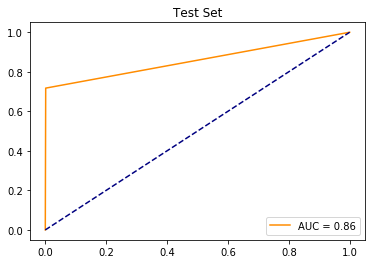

test set misclassification rate: 0.007937500000000042


In [130]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr,tpr)
plt.plot(fpr, tpr, color='darkorange', label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.title('Test Set')
plt.legend(loc="lower right")
plt.show()

misclass_rate_test = 1 - accuracy_score(y_test, y_test_pred)
print('test set misclassification rate:',misclass_rate_test)

In [124]:
oob_error = 1- clf.oob_score_
test_error = 1 - clf.score(X_test, y_test)
print("oob_error:",oob_error)
print("test_error:",test_error)

oob_error: 0.006033333333333335
test_error: 0.007937500000000042


#### (d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 2c. Compare the results with those of 2c.

In [125]:
#2.d 
clf_balanced = RandomForestClassifier(n_estimators=100, random_state=0, oob_score=True, class_weight='balanced')  
clf_balanced.fit(X_train, y_train) 
y_train_balanced = clf_balanced.predict(X_train)
y_test_balanced = clf_balanced.predict(X_test)

In [126]:
cm=confusion_matrix(y_train, y_train_balanced)
cm

array([[59000,     0],
       [    0,  1000]])

In [127]:
cm2=confusion_matrix(y_test, y_test_balanced)
cm2

array([[15611,    14],
       [  169,   206]])

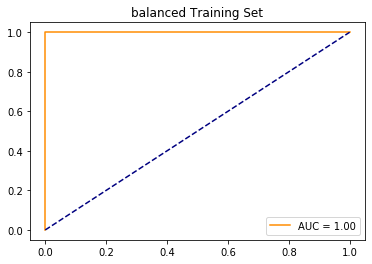

training set misclassification rate: 0.0


In [129]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
roc_auc = auc(fpr,tpr)
plt.plot(fpr, tpr, color='darkorange', label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.title('balanced Training Set')
plt.legend(loc="lower right")
plt.show()

misclass_rate_train = 1 - accuracy_score(y_train,y_train_balanced)
print('training set misclassification rate:',misclass_rate_train)

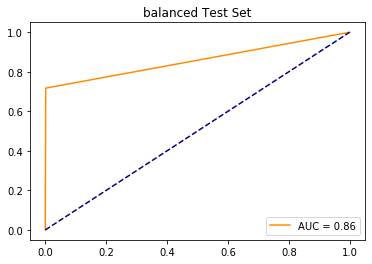

test set misclassification rate: 0.01143749999999999


In [131]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr,tpr)
plt.plot(fpr, tpr, color='darkorange', label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.title('balanced Test Set')
plt.legend(loc="lower right")
plt.show()

misclass_rate_test = 1 - accuracy_score(y_test, y_test_balanced)
print('test set misclassification rate:',misclass_rate_test)

In [ ]:
#2.e
# in another file

In [ ]:
#2.f
# in another file

#### 3.(a) As we increase s from 0, the training RSS will:
#### i. Increase initially, and then eventually start decreasing in an inverted U shape.
#### ii. Decrease initially, and then eventually start increasing in a U shape.
#### iii. Steadily increase.
#### iv. Steadily decrease.
#### v. Remain constant.

In [137]:
#https://rpubs.com/ppaquay/65562
print("Steadily decrease.")
print("If we increase s from 0, will restrict βj less and less,so the model will become more and more flexible which stimulates a steady decrease in the training RSS.")

Steadily decrease.
If we increase s from 0, will restrict βj less and less,so the model will become more and more flexible which stimulates a steady decrease in the training RSS.


#### (b) Repeat (a) for test RSS.

In [147]:
print("Decrease initially, and then eventually start to increase in a U shape. If we increase s from 0, will restrict βj less and less, and the model will become more and more flexible which stimulates at first a decrease in the test RSS before increasing again after that in a typical U shape.")

Decrease initially, and then eventually start to increase in a U shape. If we increase s from 0, will restrict βj less and less, and the model will become more and more flexible which stimulates at first a decrease in the test RSS before increasing again after that in a typical U shape.


#### (c) Repeat (a) for variance.

In [149]:
print("Steadily increase.")
print("If we increase s from 0, will restrict βj less and less, and the model will become more and more flexible which stimulates a steady increase in variance.")

Steadily increase.
If we increase s from 0, will restrict βj less and less, and the model will become more and more flexible which stimulates a steady increase in variance.


#### (d) Repeat (a) for (squared) bias.

In [151]:
print("Steadily decrease.") 
print("If we increase s from 0, will restrict βj less and less, and the model will become more and more flexible which stimulates a steady decrease in bias.")

Steadily decrease.
If we increase s from 0, will restrict βj less and less, and the model will become more and more flexible which stimulates a steady decrease in bias.


#### (e) Repeat (a) for the irreducible error.

In [152]:
print("Remain constant.")
print("By definition, the irreducible error is independent from the model, and independent from s.")

Remain constant.
By definition, the irreducible error is independent from the model, and independent from s.


#### 4. It is well-known that ridge regression tends to give similar coefficient values to correlated variables, whereas the lasso may give quite different coefficient values to correlated variables. We will now explore this property in a very simple setting. Suppose that n = 2, p = 2, x11 = x12, x21 = x22. Furthermore, suppose that y1 +y2 = 0 and x11 +x21 = 0 and x12 +x22 = 0, so that the estimate for the intercept in a least squares, ridge regression, or lasso model is zero: βˆ0 = 0.

#### (a) Write out the ridge regression optimization problem in this setting.

In [153]:
print("According to this question: (x11=x12=x1 and x21=x22=x2), the ridge regression problem seeks to minimize (y1−β̂ 1x1−β̂ 2x1)2+(y2−β̂ 1x2−β̂ 2x2)2+λ(β̂ 21+β̂ 22).")

According to this question: (x11=x12=x1 and x21=x22=x2), the ridge regression problem seeks to minimize (y1−β̂ 1x1−β̂ 2x1)2+(y2−β̂ 1x2−β̂ 2x2)2+λ(β̂ 21+β̂ 22).


#### (b) Argue that in this setting, the ridge coefficient estimates satisfy βˆ1 = βˆ2.

In [156]:
print("With respect to β̂1 and β̂2 , set β̂1=β̂2=0, we obtain :β̂1(x21+x22+λ)+β̂2(x21+x22)=y1x1+y2x2 and β̂1(x21+x22)+β̂2(x21+x22+λ)=y1x1+y2x2. Substract the two expressions above, we get β̂1=β̂2.")

With respect to β̂1 and β̂2 , set β̂1=β̂2=0, we obtain :β̂1(x21+x22+λ)+β̂2(x21+x22)=y1x1+y2x2 and β̂1(x21+x22)+β̂2(x21+x22+λ)=y1x1+y2x2. Substract the two expressions above, we get β̂1=β̂2.


#### (c) Write out the lasso optimization problem in this setting.

In [157]:
print("According to (x11=x12=x1 and x21=x22=x2), the lasso optimization problem seeks to minimize (y1−β̂1x1−β̂2x1)2+(y2−β̂1x2−β̂2x2)2+λ(|β̂1|+|β̂2|).")

According to (x11=x12=x1 and x21=x22=x2), the lasso optimization problem seeks to minimize (y1−β̂1x1−β̂2x1)2+(y2−β̂1x2−β̂2x2)2+λ(|β̂1|+|β̂2|).


#### (d) Argue that in this setting, the lasso coefficients βˆ1 and βˆ2 are not unique—in other words, there are many possible solutions to the optimization problem in (c). Describe these solutions.

In [159]:
print("Use the alternate form of the lasso optimization problem: (y1−β̂ 1x1−β̂ 2x1)2+(y2−β̂ 1x2−β̂ 2x2)2 subject to |β̂ 1|+|β̂ 2|≤s. Geometrically, the lasso constraint take the form of a diamond centered at the origin of the plane (β̂ 1,β̂ 2) which intersects the axes at a distance s from the origin. By using (x11=x12=x1, x21=x22=x2, x1+x2=0 and y1+y2=0), we have to minimize2[y1−(β̂ 1+β̂ 2)x1]2≥0.This optimization problem has a simple solution : β̂ 1+β̂ 2=y1/x1. Geometrically, this is a line parallel to the edge of the diamond of the constraints. Then, solutions to the lasso optimization problem are contours of the function [y1−(β̂ 1+β̂ 2)x1]2 that intersects the diamond of the constraints. So, the entire edge β̂ 1+β̂ 2=s (as is the edge β̂ 1+β̂ 2=−s) is a potential solution to the lasso optimization problem. Thus, the lasso optimization problem has a whole set of solutions instead of a unique one :{(β̂ 1,β̂ 2):β̂ 1+β̂ 2=s with β̂ 1,β̂ 2≥0 and β̂ 1+β̂ 2=−s with β̂ 1,β̂ 2≤0}.")

Use the alternate form of the lasso optimization problem: (y1−β̂ 1x1−β̂ 2x1)2+(y2−β̂ 1x2−β̂ 2x2)2 subject to |β̂ 1|+|β̂ 2|≤s. Geometrically, the lasso constraint take the form of a diamond centered at the origin of the plane (β̂ 1,β̂ 2) which intersects the axes at a distance s from the origin. By using (x11=x12=x1, x21=x22=x2, x1+x2=0 and y1+y2=0), we have to minimize2[y1−(β̂ 1+β̂ 2)x1]2≥0.This optimization problem has a simple solution : β̂ 1+β̂ 2=y1/x1. Geometrically, this is a line parallel to the edge of the diamond of the constraints. Then, solutions to the lasso optimization problem are contours of the function [y1−(β̂ 1+β̂ 2)x1]2 that intersects the diamond of the constraints. So, the entire edge β̂ 1+β̂ 2=s (as is the edge β̂ 1+β̂ 2=−s) is a potential solution to the lasso optimization problem. Thus, the lasso optimization problem has a whole set of solutions instead of a unique one :{(β̂ 1,β̂ 2):β̂ 1+β̂ 2=s with β̂ 1,β̂ 2≥0 and β̂ 1+β̂ 2=−s with β̂ 1,β̂ 2≤0}.


#### 5. Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X): 0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75. There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?

In [161]:
#https://rpubs.com/ppaquay/65564
print("majority vote approach:  classify X =>Red as it is the most commonly occurring class among the 10 predictions (Red:6 , Green:4).") 
print("average probability approach:  classify X=>Green as the average of the 10 probabilities is 0.45.")

majority vote approach:  classify X =>Red as it is the most commonly occurring class among the 10 predictions (Red:6 , Green:4).
average probability approach:  classify X=>Green as the average of the 10 probabilities is 0.45.


#### 6. Here we explore the maximal margin classifier on a toy data set.
#### (a) We are given n = 7 observations in p = 2 dimensions. For each observation, there is an associated class label. Sketch the observations.

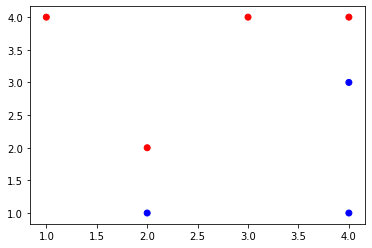

In [90]:
#https://rpubs.com/ppaquay/65566
import matplotlib.pyplot as plt

x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
colors = ["red", "red", "red", "red", "blue", "blue", "blue"]
plt.scatter(x1, x2, c= colors)

#### (b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1)).

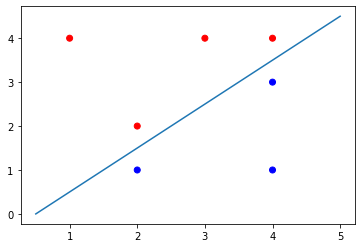

In [91]:
plt.scatter(x1, x2, c= colors) 
x=[0.5,2,4,5]
y=[0,1.5,3.5,4.5]
plt.plot(x,y)

#### (c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if
#### β0 + β1X1 + β2X2 > 0, and classify to Blue otherwise.” Provide the values for β0, β1, and β2.

In [162]:
print("classification rule: “Classify to Red if X1−X2−0.5<0, and classify to Blue otherwise.”")

classification rule: “Classify to Red if X1−X2−0.5<0, and classify to Blue otherwise.”


#### (d) On your sketch, indicate the margin for the maximal margin hyperplane.

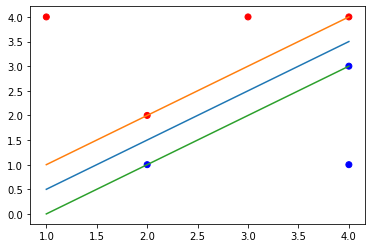

In [139]:
#https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept-in-matplotlib
plt.scatter(x1, x2, c= colors)
# ![image](image.png)
x = [1,2,3,4]
x = np.array(x)
plt.plot(x,x-0.5)
plt.plot(x,x)
plt.plot(x,x-1)
#geom_abline(intercept = 15, slope = -1.5)
#abline[-0.5, 1]
#abline(-1, 1, lty = 2)
#abline(0, 1, lty = 2)
#plt.plot(x1, abline, 'b')

In [95]:
print("margin=1/4")

margin=1/4


#### (e) Indicate the support vectors for the maximal margin classifier.

In [102]:
print("support vectors:(2,1), (2,2), (4,3),(4,4)")

support vectors:(2,1), (2,2), (4,3),(4,4)


#### (f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.

In [164]:
print("Remove the observation (4,1) would not change the maximal margin hyperplane because it is not a support vector.")

Remove the observation (4,1) would not change the maximal margin hyperplane because it is not a support vector.


#### (g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.

X1−X2−0.3=0 is not the optimal separating hyperplane.


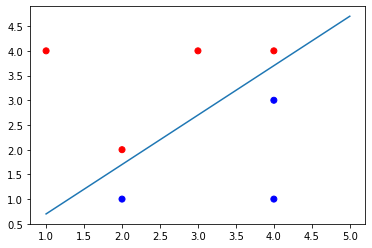

In [142]:
plt.scatter(x1, x2, c= colors)
# ![image](image.png)
x = [1,2,3,4,5]
x = np.array(x)
plt.plot(x,x-0.3)
#plt.plot(x,x)
#plt.plot(x,x-1)
print("X1−X2−0.3=0 is not the optimal separating hyperplane.")

#### (h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.

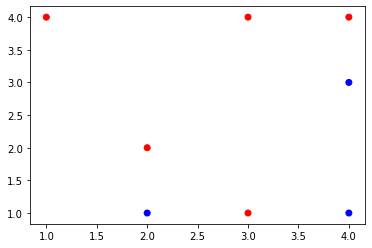

In [143]:
x1 = [3, 2, 4, 1, 2, 4, 4,3]
x2 = [4, 2, 4, 4, 1, 3, 1,1]
colors = ["red", "red", "red", "red", "blue", "blue", "blue","red"]
plt.scatter(x1, x2, c= colors)